<a href="https://colab.research.google.com/github/SteAmarante/python-data-science/blob/main/aula_07/Visualiza%C3%A7%C3%A3o_de_Dados_com_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualização de Dados com Seaborn

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/vinhos.csv")
df

,year,month,location,location_type,category,grape_type,volume_hl,value_usd
0,2015,1,AC,Brazil_State,Production,Table,910,1782.31
1,2015,1,AC,Brazil_State,Production,Wine,3822,11435.90
2,2015,1,AC,Brazil_State,Production,Sparkling,516,902.97
3,2015,1,AC,Brazil_State,Sales,Table,3494,10491.74
4,2015,1,AC,Brazil_State,Sales,Wine,180,279.26
...,...,...,...,...,...,...,...,...
26635,2024,12,China,Country,Import,Wine,3574,12650.27
26636,2024,12,China,Country,Import,Sparkling,825,3844.02
26637,2024,12,China,Country,Export,Table,2115,6153.84
26638,2024,12,China,Country,Export,Wine,2107,9355.02


##Gráficos de Colunas

Os gráficos de colunas representam dados como colunas verticais em um plano cartesiano, onde as alturas das
colunas denotam valores quantificáveis. Cada coluna corresponde a uma categoria, permitindo fácil visualização e comparação.

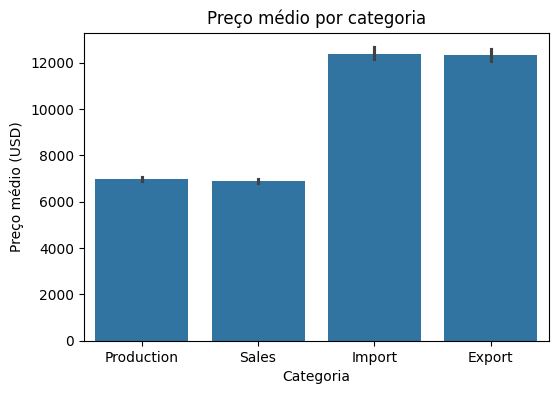

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x="category",
    y="value_usd",
    estimator="mean"
)

plt.title("Preço médio por categoria")
plt.xlabel("Categoria")
plt.ylabel("Preço médio (USD)")
plt. show()

##Gráficos de Barras

Os gráficos de barras são similares aos de colunas, mas utilizam barras horizontais. Este formato facilita a leitura quando os rótulos das categorias são longos.

/tmp/ipython-input-2518653620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns. countplot(


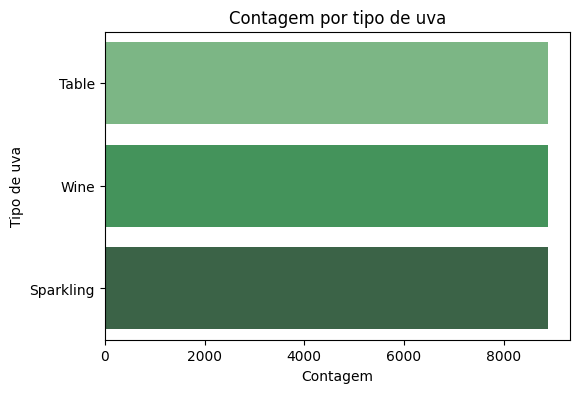

In [24]:
plt.figure(figsize=(6,4))
sns. countplot(
    data=df,
    y="grape_type",
    order=df["grape_type"].value_counts().index,
    palette="Greens_d"
)

plt.title("Contagem por tipo de uva")
plt.xlabel("Contagem")
plt.ylabel("Tipo de uva")
plt.show()

##Gráficos de Linhas

Os gráficos de linhas utilizam pontos conectados por linhas para visualizar a variação de dados ao longo do tempo. Cada ponto representa um valor em um determinado momento.

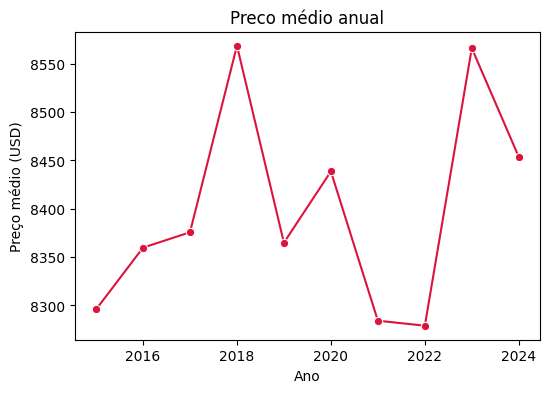

In [25]:
df_year = df.groupby("year")["value_usd"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(
    data=df_year,
    x="year",
    y="value_usd",
    marker="o",
    color="crimson"
)

plt.title("Preco médio anual")
plt.xlabel("Ano")
plt.ylabel("Preço médio (USD)")
plt.show()

##HISTOGRAMAS

O histograma é um modelo clássico que separa as colunas por cores e possibilita uma visualização em que as cores ajudam a contar a história. É possível observar arelação entre categorias e classes de
dados e suas ocorrências. Histogramas também são chamados de distribuições de frequências.

<function matplotlib.pyplot.show(close=None, block=None)>

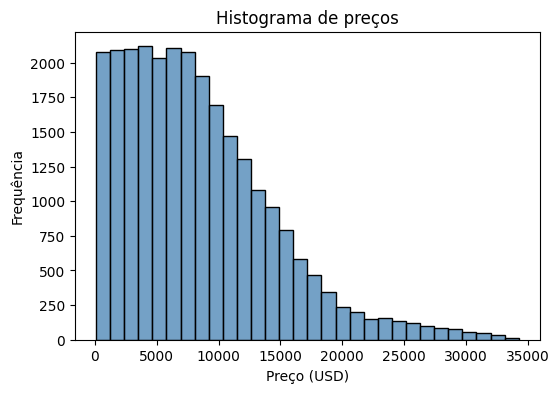

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(
    df["value_usd"],
    bins=30,
    kde=False,
    color="steelblue"
)

plt.title("Histograma de preços")
plt.xlabel("Preço (USD)")
plt.ylabel("Frequência")
plt. show

##DISPERSÃO

Ferramenta visual que representa a relação entre duas variáveis numéricas. Ele mostra como os valores de uma variável afetam a outra, permitindo identificar padrões e tendências nos dados. Cada ponto no gráfico representa um par de valores, com uma variável plotada no eixo horizontal (X) e a outra no eixo vertical (Y)

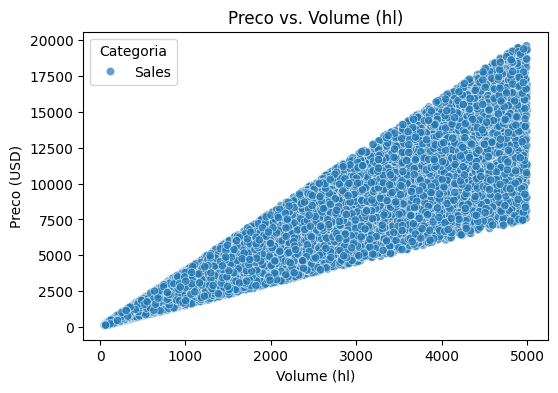

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df[df['category'] == 'Sales'],
    x="volume_hl",
    y="value_usd",
    hue="category",
    alpha=0.7,
    palette="tab10"
)

plt.title("Preco vs. Volume (hl)")
plt.xlabel("Volume (hl)")
plt.ylabel("Preco (USD)")
plt.legend(title="Categoria")
plt.show()

##BOX PLOT

Box plot é uma ferramenta gráfica utilizada para
representar e ilustrar um conjunto de dados
distribuídos em cinco diferentes medidas, que
possibilitam diversos tipos de observações em
uma única análise.

/tmp/ipython-input-2050620354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


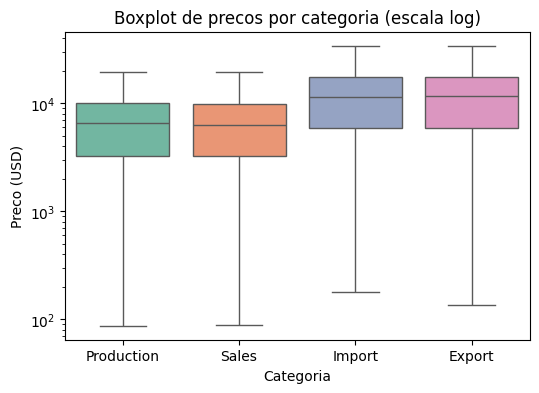

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="category",
    y="value_usd",
    palette="Set2"
)
plt.yscale("log")
plt.title("Boxplot de precos por categoria (escala log)")
plt.xlabel("Categoria")
plt.ylabel("Preco (USD)")
plt.show()

##

##HEAT MAP

Um heatmap, ou mapa de calor, é uma representação visual de dados onde os valores são codificados por cores, permitindo identificar áreas de alta e baixa
intensidade de forma intuitiva. Em termos simples, é uma ferramenta que usa cores para mostrar onde as pessoas mais interagem ou se concentram em uma página web, loja física ou qualquer outro espaço

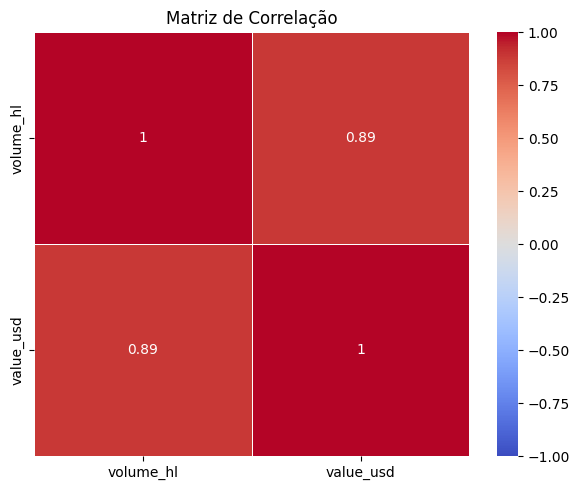

In [29]:
corr = df[["volume_hl","value_usd"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmin =- 1,
    vmax=1,
    linewidths=0.5
)

plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()